In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [164]:
titanic = sns.load_dataset('titanic')
print(titanic.shape)

(891, 15)


In [165]:
df = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()
print(df.shape)

(712, 8)


In [166]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [167]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['age_fare_interaction'] = df['age'] * df['fare']
df['is_child'] = (df['age'] < 12).astype(int)

In [168]:
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True).copy()

In [169]:
print(df.head())

   survived  pclass   age  sibsp  parch     fare  family_size  \
0         0       3  22.0      1      0   7.2500            2   
1         1       1  38.0      1      0  71.2833            2   
2         1       3  26.0      0      0   7.9250            1   
3         1       1  35.0      1      0  53.1000            2   
4         0       3  35.0      0      0   8.0500            1   

   age_fare_interaction  is_child  sex_male  embarked_Q  embarked_S  
0              159.5000         0      True       False        True  
1             2708.7654         0     False       False       False  
2              206.0500         0     False       False        True  
3             1858.5000         0     False       False        True  
4              281.7500         0      True       False        True  


In [170]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target
feature_names = iris.feature_names
print(x[:10])
print(y[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]


In [171]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

[0.72962445 0.22850762]


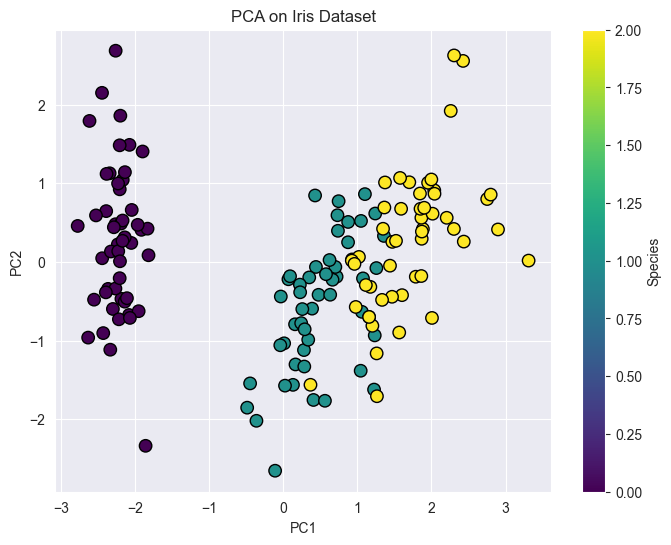

In [172]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap='viridis', edgecolor='k', s=80)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Iris Dataset")
plt.colorbar(label="Species")
plt.show()

In [173]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic').copy()
num_cols = ["age", "fare", "pclass", "sibsp", "parch"]

df = df.dropna(subset=['survived']).copy()
y = df['survived'].astype(int)

In [174]:
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())
x = df[num_cols].astype(float)
scaler = StandardScaler()
X_std = scaler.fit_transform(x)

In [175]:
pca = PCA(n_components=2, svd_solver="full")
X_pca = pca.fit_transform(X_std)
evr = pca.explained_variance_ratio_
print("Explained variance ratio (PC1, PC2):", evr, " | cumulative:", evr.sum())

Explained variance ratio (PC1, PC2): [0.33960812 0.32520788]  | cumulative: 0.6648159969553279
